# Credit Card Fraud Detection
----

## About The Dataset:

#### <ins>Context:</ins>

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### <ins>Content:</ins> 

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

#### [Dataset Link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)


## The Index:
1. [The dependencies](#1)
2. [Explorirng the data](#2)
3. [Data counting and fraud percentage](#3)
3. [Case amount stats](#4)
3. [Distributions](#5)
3. [Scaling the amount](#6)
3. [Data spliting](#7)
3. [The Metrics](#8)
3. [Classification algorithms](#9)
3. [Performance comparaisons](#10)
3. [useful links](#11)

## <a name="1">Importing the dependencies:</a>

In [1]:
import pandas as pd # data analysis and manipulation
import numpy as np #  arrays manipulation
import matplotlib.pyplot as plt # to create visualizations
from termcolor import colored as cl # Color formatting for output in terminal
import seaborn as sns # data vizualization based on matplotlib

from imblearn.over_sampling import SMOTE #Oversampling for Imbalanced Classification (duplicate examples from the minority class)

import warnings # ignore warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets

## scaling
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.preprocessing import MinMaxScaler # data scaling
from sklearn.model_selection import train_test_split # data split

## Algorithms
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn.neighbors import KNeighborsClassifier # k-nearest neighbors
from sklearn.linear_model import LogisticRegression # Logistic regression 
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.naive_bayes import GaussianNB #Gaussian Naive Bayes
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier
from sklearn.svm import SVC # C-Support Vector Classification

from sklearn import metrics

import time


from sklearn.svm import LinearSVC # LinearSVC classifier
import multiprocessing # bypass the GIL by allowing multiprocessing

## <a name="2">Exploring the data:</a>

In [2]:
total_time = time.time()


df = pd.read_csv(r'archive/creditcard.csv') #importing data
df.head() #First 5 columns of our data
df = df.loc[1:10000] # limit data to first 10.000 cols
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15004.0,1.228455,0.049488,1.022099,0.386471,-0.973228,-1.067822,-0.383162,-0.205407,1.699304,...,-0.322912,-0.730294,0.205601,0.686302,-0.071008,0.729846,-0.092276,0.012277,12.18,0
9997,15008.0,-0.971734,0.744625,2.334822,-0.408046,-0.999231,-0.629294,-0.377212,0.481230,1.599496,...,-0.116821,-0.141219,-0.026115,0.712719,-0.372964,0.750323,-0.107875,0.031272,4.05,0
9998,15010.0,-1.529666,1.475870,1.507624,-0.662935,-1.037152,-1.159860,-0.303219,0.745766,0.946896,...,-0.197993,-0.634088,0.100631,0.669449,-0.269750,0.611964,-0.169789,0.007846,4.05,0
9999,15012.0,-1.181721,1.485264,1.958715,2.587943,-0.504092,-0.126697,0.939038,0.175638,-0.756318,...,-0.010641,-0.191361,0.204004,0.663928,0.288780,-0.033612,-0.142682,0.028149,159.28,0


In [3]:
df.shape #the dimensionality of our data

(10000, 31)

## <a name="3">Data counting and fraud percentage:</a>

In [4]:

cases = len(df) # get length of the dataset to conclude num of cases
nonfraud_count = len(df[df.Class == 0]) # count of non fraud cases
fraud_count = len(df[df.Class == 1]) # count of fraud cases
fraud_percentage = round(fraud_count/nonfraud_count*100, 2) # the percentage of fraud cases

print(cl('CASE COUNT : ', attrs = ['bold'],color='red'))
print(cl('--------------------------------------------', attrs = ['bold'],color='red'))
print('Total number of cases are :',end=" ")
print(cl('{}'.format(cases), attrs = ['bold'],color='green'))
print('Non-fraud cases are :',end=" ")
print(cl('{}'.format(nonfraud_count), attrs = ['bold'],color='green'))
print('Fraud cases are :',end=" ")
print(cl('{}'.format(fraud_count), attrs = ['bold'],color='green'))
print('Percentage of fraud cases is :',end=" ")
print(cl('{}%'.format(fraud_percentage), attrs = ['bold'],color='green'))
print(cl('--------------------------------------------', attrs = ['bold'],color='red'))


CASE COUNT : 
--------------------------------------------
Total number of cases are : 10000
Non-fraud cases are : 9962
Fraud cases are : 38
Percentage of fraud cases is : 0.38%
--------------------------------------------


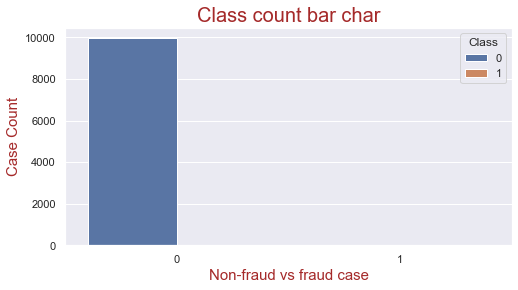

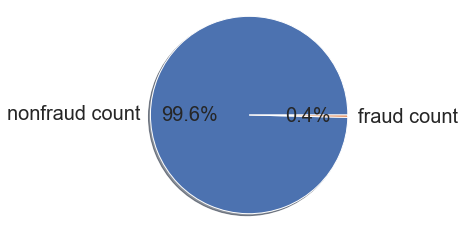

In [5]:
# A bar char representing the count of Non-fraud cases vs Fraud cases
plt.figure(figsize=(8,4),linewidth=0)
sns.set_theme(style="darkgrid")
sns.countplot(x="Class", hue="Class", data=df)
plt.title("Class count bar char", fontsize=20,color="brown")
plt.xlabel("Non-fraud vs fraud case", fontsize=15,color="brown")
plt.ylabel("Case Count", fontsize=15,color="brown")


# Pie chart, where the slices will be ordered and plotted counter-clockwise

import matplotlib.pyplot as plt

labels = 'nonfraud count', 'fraud count'
sizes = [nonfraud_count,fraud_count]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0,textprops={'size': '20'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()







## <a name="4">Case amount stats:</a>

In [6]:
nonfraud_cases = df[df.Class == 0]  # get non fraud cases only
fraud_cases = df[df.Class == 1] # #get fraud cases only

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold'],color="red"))
print(cl('--------------------------------------------', attrs = ['bold'],color="red"))
print(cl('>>> NON-FRAUD CASE AMOUNT STATS <<<', attrs = ['bold']))
print((nonfraud_cases.Amount.describe()))
print(cl('--------------------------------------------', attrs = ['bold'],color="red"))
print(cl('>>> FRAUD CASE AMOUNT STATS <<<', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold'],color="red"))


CASE AMOUNT STATISTICS
--------------------------------------------
>>> NON-FRAUD CASE AMOUNT STATS <<<
count    9962.000000
mean       62.968028
std       183.900532
min         0.000000
25%         5.147500
50%        15.950000
75%        51.157500
max      7712.430000
Name: Amount, dtype: float64
--------------------------------------------
>>> FRAUD CASE AMOUNT STATS <<<
count      38.000000
mean       75.730526
std       304.521215
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64
--------------------------------------------


## <a name="5">Distributions:</a>

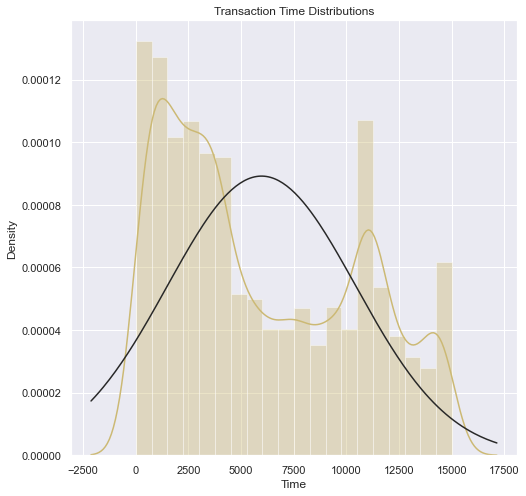

In [7]:
# Transaction Time Distribution
from scipy.stats import norm
plt.figure(figsize=(8,8))
plt.title('Transaction Time Distributions')

sns.distplot(df['Time'],fit=norm,color='y')

plt.show()

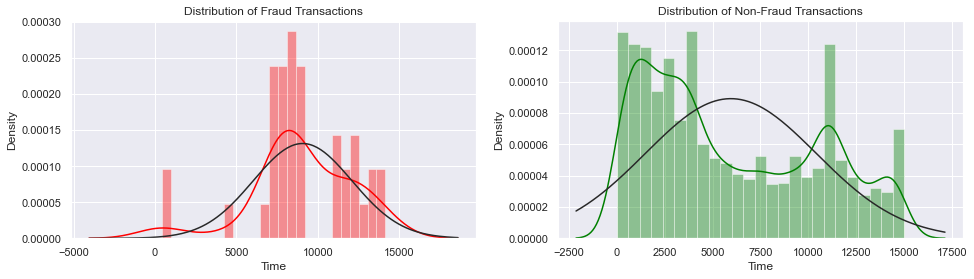

In [8]:
# Fraud Time Distribution

fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Time'],bins=25,color='red', ax=axs[0],fit=norm)
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=25,color='green', ax=axs[1],fit=norm)
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()

## <a name="6">Scaling the amount:</a>

In [9]:
df['amount_log'] = np.log(df.Amount + 0.01) # Scale amount by log

ss = StandardScaler()
df['amount_scaled'] = ss.fit_transform(df['Amount'].values.reshape(-1,1)) #Scale amount by Standardization

norm = MinMaxScaler()
df['amount_minmax'] = norm.fit_transform(df['Amount'].values.reshape(-1,1)) #Scale amount by Normalization

## <a name="7">Data spliting:</a>

In [10]:
X = df.drop(['Class','Amount','amount_minmax','amount_log'],axis=1) #remove those rows, we use amount_scaled instead of amount
y = df['Class'] # we will use y to compare it with the input


# we allocate 80% of the data for training and the remaining for testing
#X_train == training input, X_test == testing input, y_train == training output, y_test == testing output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True) 

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)
print('\n')
print('............')
print('\n')


#duplicate examples from the fraud class (minority) to balance the data

smote= SMOTE(sampling_strategy='minority')
X_train_smote,y_train_smote=smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = X_test, y_test

print("X_train_smote: ",X_train_smote.shape)
print("y_train_smote: ",y_train_smote.shape)
print("X_test_smote: ",X_test_smote.shape)
print("y_test_smote: ",y_test_smote.shape)




X_train:  (8000, 30)
y_train:  (8000,)
X_test:  (2000, 30)
y_test:  (2000,)


............


X_train_smote:  (15942, 30)
y_train_smote:  (15942,)
X_test_smote:  (2000, 30)
y_test_smote:  (2000,)


## <a name="8">The Metrics:</a>

In [11]:

#store the results here for later comparaison
names=[]
aucs_tests = []   #AUC-ROC CURVE https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
accuracy_tests = []
precision_tests = []
recall_tests = []
f1_score_tests = []
mcc_score_tests = []
balanced_accuracy_tests = []
top_k_accuracy_tests = []
cohen_kappa_tests = []

# confusion matrix plot
def confusion_matrix_plot(y_test, y_test_pred):
  confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred) 
  plt.clf()
  plt.imshow(confusion_matrix, cmap=plt.cm.Accent)
  categoryNames = ['non fraud','fraud']
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames,color='brown')
  plt.yticks(ticks, categoryNames,color='brown')
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]),fontsize=16,color='white')
  plt.show()


# calculate the peformance of each classification methode with 9 different metrics

def performance(model):
    
    for name, model, X_train, y_train, X_test, y_test in model:
        
        #appending name
        names.append(name)
        
        # Build model
        model.fit(X_train, y_train)
        
        #predictions
        y_test_pred = model.predict(X_test)
        
        # calculate accuracy
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_tests.append(Accuracy_test)
        
        # calculate auc
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_tests.append(Aucs_test)
        
        #precision_calculation
        Precision_score_test = metrics.precision_score(y_test , y_test_pred)
        precision_tests.append(Precision_score_test)
        
        # calculate recall
        Recall_score_test = metrics.recall_score(y_test , y_test_pred)
        recall_tests.append(Recall_score_test)
        
        #calculating F1
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_score_tests.append(F1Score_test)
        
        #calculating MCC
        MCC_score_tests = metrics.matthews_corrcoef(y_test, y_test_pred)
        mcc_score_tests.append(MCC_score_tests)
        
        # calculating balanced accuracy score
        Balanced_Accuracy_test = metrics.balanced_accuracy_score(y_test,y_test_pred)
        balanced_accuracy_tests.append(Balanced_Accuracy_test)
        
        # calculating top k accuracy
        
        Top_K_Accuracy_test = metrics.top_k_accuracy_score(y_test,y_test_pred)
        top_k_accuracy_tests.append(Top_K_Accuracy_test)

        #calculating cohenvkappa score
        Cohen_kappa_test = metrics.cohen_kappa_score(y_test,y_test_pred)
        cohen_kappa_tests.append(Cohen_kappa_test)
        
        # draw confusion matrix
        confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred) 
        
        print("Model Name :", name)
        print('Test Accuracy : {0:0.5f}'.format(Accuracy_test))
        print('Top K Accuracy Score : {0:0.5f}'.format(Top_K_Accuracy_test))
        print('Balanced Accuracy : {0:0.5f}'.format(Balanced_Accuracy_test))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        print('Test Precision : {0:0.5f}'.format(Precision_score_test))
        print('Test Recall : {0:0.5f}'.format(Recall_score_test))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        print("Matthews correlation coefficient : {0:0.5f}".format(MCC_score_tests))
        print('Cohen Kappa Score : {0:0.5f}'.format(Cohen_kappa_test))
        print('Confusion Matrix : \n',  confusion_matrix)
#         confusion_matrix_plot(y_test, y_test_pred)
       
        print("\n")
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("threshold: ",threshold)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
        
        
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()
    



## <a name="9">Classification algorithms:</a>

Logical Regression Classifier performance test is running...

Model Name : LR IMBALANCED
Test Accuracy : 0.99550
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.50000
Test AUC : 0.50000
Test Precision : 0.00000
Test Recall : 0.00000
Test F1 : 0.00000
Matthews correlation coefficient : 0.00000
Cohen Kappa Score : 0.00000
Confusion Matrix : 
 [[1991    0]
 [   9    0]]


threshold:  1
Model Name : LR SMOTE
Test Accuracy : 0.98750
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.99372
Test AUC : 0.99372
Test Precision : 0.26471
Test Recall : 1.00000
Test F1 : 0.41860
Matthews correlation coefficient : 0.51126
Cohen Kappa Score : 0.41444
Confusion Matrix : 
 [[1966   25]
 [   0    9]]


threshold:  1


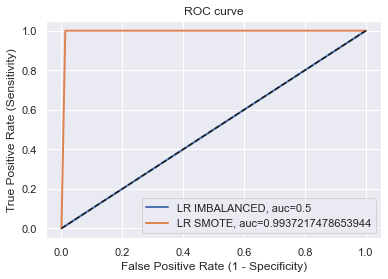

Time taken by Logical Regression Classifier is :       2.73s

****************************************


Random Forest Classifier performance test is running...

Model Name : RF IMABALANCED
Test Accuracy : 0.99950
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.94444
Test AUC : 0.94444
Test Precision : 1.00000
Test Recall : 0.88889
Test F1 : 0.94118
Matthews correlation coefficient : 0.94257
Cohen Kappa Score : 0.94093
Confusion Matrix : 
 [[1991    0]
 [   1    8]]


threshold:  1
Model Name : RF SMOTE
Test Accuracy : 0.99900
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.88889
Test AUC : 0.88889
Test Precision : 1.00000
Test Recall : 0.77778
Test F1 : 0.87500
Matthews correlation coefficient : 0.88147
Cohen Kappa Score : 0.87451
Confusion Matrix : 
 [[1991    0]
 [   2    7]]


threshold:  1


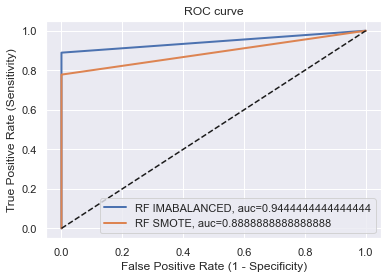

Time taken by Random Forest Classifier is :       7.85s

****************************************


Gaussian Naïve Bayes Classifier performance test is running...

Model Name : NB IMBALANCED
Test Accuracy : 0.99300
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.94118
Test AUC : 0.94118
Test Precision : 0.38095
Test Recall : 0.88889
Test F1 : 0.53333
Matthews correlation coefficient : 0.57939
Cohen Kappa Score : 0.53037
Confusion Matrix : 
 [[1978   13]
 [   1    8]]


threshold:  1
Model Name : NB SMOTE
Test Accuracy : 0.99450
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.88663
Test AUC : 0.88663
Test Precision : 0.43750
Test Recall : 0.77778
Test F1 : 0.56000
Matthews correlation coefficient : 0.58097
Cohen Kappa Score : 0.55745
Confusion Matrix : 
 [[1982    9]
 [   2    7]]


threshold:  1


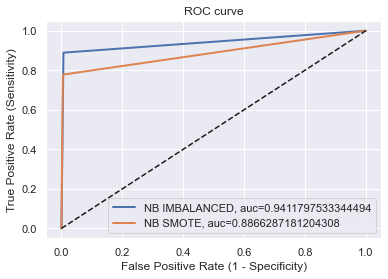

Time taken by Gaussian Naïve Bayes Classifier is :       0.69s

****************************************


Decision Tree Classifier performance test is running...

Model Name : DT IMBALANCED
Test Accuracy : 1.00000
Top K Accuracy Score : 1.00000
Balanced Accuracy : 1.00000
Test AUC : 1.00000
Test Precision : 1.00000
Test Recall : 1.00000
Test F1 : 1.00000
Matthews correlation coefficient : 1.00000
Cohen Kappa Score : 1.00000
Confusion Matrix : 
 [[1991    0]
 [   0    9]]


threshold:  1
Model Name : DT SMOTE
Test Accuracy : 0.99850
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.88864
Test AUC : 0.88864
Test Precision : 0.87500
Test Recall : 0.77778
Test F1 : 0.82353
Matthews correlation coefficient : 0.82422
Cohen Kappa Score : 0.82278
Confusion Matrix : 
 [[1990    1]
 [   2    7]]


threshold:  1


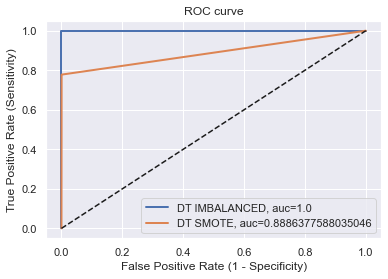

Time taken by Decision Tree Classifier is :       1.64s

****************************************


K-Nearest Neighbor Class performance test is running...

Model Name : KNN IMBALANCE
Test Accuracy : 0.99550
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.50000
Test AUC : 0.50000
Test Precision : 0.00000
Test Recall : 0.00000
Test F1 : 0.00000
Matthews correlation coefficient : 0.00000
Cohen Kappa Score : 0.00000
Confusion Matrix : 
 [[1991    0]
 [   9    0]]


threshold:  1
Model Name : KNN SMOTE
Test Accuracy : 0.99650
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.77702
Test AUC : 0.77702
Test Precision : 0.62500
Test Recall : 0.55556
Test F1 : 0.58824
Matthews correlation coefficient : 0.58751
Cohen Kappa Score : 0.58648
Confusion Matrix : 
 [[1988    3]
 [   4    5]]


threshold:  1


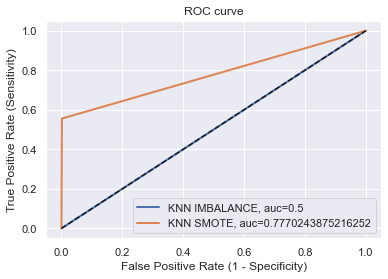

Time taken by K-Nearest Neighbor Class is :       2.38s

****************************************


XG Boost Classifier performance test is running...

Model Name : XGBOOST IMBALANCED
Test Accuracy : 0.99850
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.88864
Test AUC : 0.88864
Test Precision : 0.87500
Test Recall : 0.77778
Test F1 : 0.82353
Matthews correlation coefficient : 0.82422
Cohen Kappa Score : 0.82278
Confusion Matrix : 
 [[1990    1]
 [   2    7]]


threshold:  1
Model Name : XGBOOST SMOTE
Test Accuracy : 0.99850
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.88864
Test AUC : 0.88864
Test Precision : 0.87500
Test Recall : 0.77778
Test F1 : 0.82353
Matthews correlation coefficient : 0.82422
Cohen Kappa Score : 0.82278
Confusion Matrix : 
 [[1990    1]
 [   2    7]]


threshold:  1


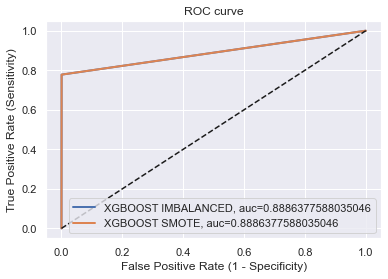

Time taken by XG Boost Classifier is :      21.68s

****************************************


MLP Classifier performance test is running...

Model Name : MLPClassifier IMBALANCE
Test Accuracy : 0.99900
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.99950
Test AUC : 0.99950
Test Precision : 0.81818
Test Recall : 1.00000
Test F1 : 0.90000
Matthews correlation coefficient : 0.90408
Cohen Kappa Score : 0.89950
Confusion Matrix : 
 [[1989    2]
 [   0    9]]


threshold:  1
Model Name : MLPClassifier SMOTE
Test Accuracy : 0.99950
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.99975
Test AUC : 0.99975
Test Precision : 0.90000
Test Recall : 1.00000
Test F1 : 0.94737
Matthews correlation coefficient : 0.94845
Cohen Kappa Score : 0.94712
Confusion Matrix : 
 [[1990    1]
 [   0    9]]


threshold:  1


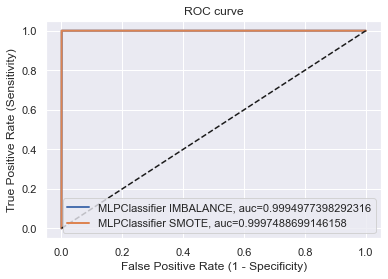

Time taken by MLP Classifier is :      24.79s

****************************************


LinearSVC performance test is running...

Model Name : LinearSVC IMBALANCE
Test Accuracy : 0.99550
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.50000
Test AUC : 0.50000
Test Precision : 0.00000
Test Recall : 0.00000
Test F1 : 0.00000
Matthews correlation coefficient : 0.00000
Cohen Kappa Score : 0.00000
Confusion Matrix : 
 [[1991    0]
 [   9    0]]


threshold:  1
Model Name : LinearSVC SMOTE
Test Accuracy : 0.99900
Top K Accuracy Score : 1.00000
Balanced Accuracy : 0.99950
Test AUC : 0.99950
Test Precision : 0.81818
Test Recall : 1.00000
Test F1 : 0.90000
Matthews correlation coefficient : 0.90408
Cohen Kappa Score : 0.89950
Confusion Matrix : 
 [[1989    2]
 [   0    9]]


threshold:  1


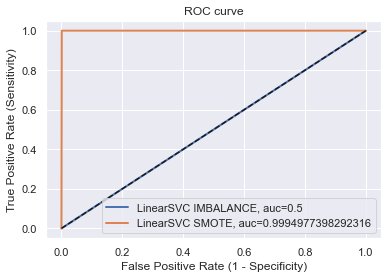

Time taken by LinearSVC is :       3.00s

****************************************




In [12]:
time_result=[]
list_of_models = ['Logical Regression Classifier','Random Forest Classifier','Gaussian Naïve Bayes Classifier',
                 'Decision Tree Classifier','K-Nearest Neighbor Class','XG Boost Classifier','MLP Classifier'
                 ,'LinearSVC']
i = 0

#Testing2
# n_estimators = 10
# Testingclassifier2=[]
# start_time = time.time()
# Testingclassifier2.append(('SVMclassifier IMBALANCE', OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators)),X_train,y_train,X_test,y_test))
# Testingclassifier2.append(('SVMclassifier SMOTE',OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators)),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
# print('starting...')
# performance(Testingclassifier2)
# print(cl('Time taken by Testingclassifier2  is : {:10.2f}s\n'.format(time.time() - start_time),attrs = ['bold'],color='green'))
# print(cl('*',color='green')*40 + '\n\n')
# time_result.append({'SVM(SVC)':time.time() - start_time})




# 1. Logical Regression Classifier


LRmodel=[]
start_time = time.time()
LRmodel.append(('LR IMBALANCED', LogisticRegression(solver='saga',multi_class='multinomial'),X_train, y_train, X_test, y_test))
LRmodel.append(('LR SMOTE', LogisticRegression(solver='saga',multi_class='multinomial'),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(LRmodel)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40+'\n\n')
time_result.append(time.time() - start_time)
i = i + 1
# 2. Random Forest Classifier

RFmodel = []
start_time = time.time()
RFmodel.append(('RF IMABALANCED', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodel.append(('RF SMOTE', RandomForestClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(RFmodel)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40 + '\n\n')
time_result.append(time.time() - start_time)
i = i + 1
# 3. Gaussian Naïve Bayes Classifier

NBmodel = []
start_time = time.time()
NBmodel.append(('NB IMBALANCED', GaussianNB(),X_train,y_train,X_test,y_test))
NBmodel.append(('NB SMOTE', GaussianNB(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(NBmodel)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40 + '\n\n')
time_result.append(time.time() - start_time)
i = i + 1
# 4. Decision Tree Classifier

DTmodel = []
start_time = time.time()
DTmodel.append(('DT IMBALANCED', DecisionTreeClassifier(),X_train,y_train,X_test,y_test))
DTmodel.append(('DT SMOTE', DecisionTreeClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(DTmodel)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40 + '\n\n')
time_result.append(time.time() - start_time)
i = i + 1
# 5. K-Nearest Neighbor Class

KNNmodel = []
start_time = time.time()
KNNmodel.append(('KNN IMBALANCE', KNeighborsClassifier(),X_train,y_train,X_test,y_test))
KNNmodel.append(('KNN SMOTE', KNeighborsClassifier(),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(KNNmodel)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40 + '\n\n')
time_result.append(time.time() - start_time)
i = i + 1
# 6. XG Boost Classifier

xgBOOST=[]
start_time = time.time()
xgBOOST.append(('XGBOOST IMBALANCED', XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train, y_train, X_test, y_test))
xgBOOST.append(('XGBOOST SMOTE', XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(xgBOOST)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40 + '\n\n')
time_result.append(time.time() - start_time)
i = i + 1
# 7. MLP Classifier

MLPclassifier=[]
start_time = time.time()
MLPclassifier.append(('MLPClassifier IMBALANCE', MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000),X_train,y_train,X_test,y_test))
MLPclassifier.append(('MLPClassifier SMOTE',MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(MLPclassifier)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40 + '\n\n')
time_result.append(time.time() - start_time)
i = i + 1
#8. SVM(SVC)

# SVMclassifier=[]
# start_time = time.time()
# SVMclassifier.append(('SVMclassifier IMBALANCE', SVC(kernel='sigmoid', random_state=77,cache_size=1000),X_train,y_train,X_test,y_test))
# SVMclassifier.append(('SVMclassifier SMOTE',SVC(kernel='sigmoid', random_state=77,cache_size=1000),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
# print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
# performance(SVMclassifier)

# print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
# print(cl('*',color='green')*40 + '\n\n')
# time_result.append({'SVM(SVC)':time.time() - start_time})
# i = i + 1
#Randomness of the underlying implementations: The underlying implementations of 
#SVC and NuSVC use a random number generator only to shuffle the data for probability estimation (when probability is set to True)


#8. LinearSVC


LSVC=[]
start_time = time.time()
LSVC.append(('LinearSVC IMBALANCE', LinearSVC(random_state=0, tol=1e-5),X_train,y_train,X_test,y_test))
LSVC.append(('LinearSVC SMOTE',LinearSVC(random_state=0, tol=1e-5),X_train_smote, y_train_smote, X_test_smote, y_test_smote))
print(cl('{} performance test is running...\n'.format(list_of_models[i]),attrs = ['bold'],color='blue'))
performance(LSVC)

print(cl('Time taken by {} is : {:10.2f}s\n'.format(list_of_models[i],time.time() - start_time),attrs = ['bold'],color='green'))
print(cl('*',color='green')*40 + '\n\n')
time_result.append(time.time() - start_time)
i = i + 1






In [13]:
# COMPARE MCC SCORE FOR ALL DATASETS
comparison={
    'Model': names,
    'Accuracy': accuracy_tests,
    'AUC': aucs_tests,
    'Precision Score' : precision_tests,
    'Recall Score': recall_tests, 
    'F1 Score': f1_score_tests,
    "Balanced Accuracy": balanced_accuracy_tests,
    "Top K Accuracy": top_k_accuracy_tests,
    "Cohen Kappa Score": cohen_kappa_tests,
    'MCC Score': mcc_score_tests,
}

print(cl("Comparing performance of various Classifiers sorted by MCC Score : ",attrs=['bold'],color='blue'))
comparison=pd.DataFrame(comparison)
comparison.sort_values('MCC Score',ascending=False)

Comparing performance of various Classifiers sorted by MCC Score : 


,Model,Accuracy,AUC,Precision Score,Recall Score,F1 Score,Balanced Accuracy,Top K Accuracy,Cohen Kappa Score,MCC Score
6,DT IMBALANCED,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
13,MLPClassifier SMOTE,0.9995,0.999749,0.900000,1.000000,0.947368,0.999749,1.0,0.947118,0.948445
2,RF IMABALANCED,0.9995,0.944444,1.000000,0.888889,0.941176,0.944444,1.0,0.940926,0.942572
12,MLPClassifier IMBALANCE,0.9990,0.999498,0.818182,1.000000,0.900000,0.999498,1.0,0.899503,0.904080
15,LinearSVC SMOTE,0.9990,0.999498,0.818182,1.000000,0.900000,0.999498,1.0,0.899503,0.904080
3,RF SMOTE,0.9990,0.888889,1.000000,0.777778,0.875000,0.888889,1.0,0.874506,0.881474
7,DT SMOTE,0.9985,0.888638,0.875000,0.777778,0.823529,0.888638,1.0,0.822779,0.824218
10,XGBOOST IMBALANCED,0.9985,0.888638,0.875000,0.777778,0.823529,0.888638,1.0,0.822779,0.824218
11,XGBOOST SMOTE,0.9985,0.888638,0.875000,0.777778,0.823529,0.888638,1.0,0.822779,0.824218
9,KNN SMOTE,0.9965,0.777024,0.625000,0.555556,0.588235,0.777024,1.0,0.586484,0.587510


In [14]:
# COMPARE Accuracy SCORE FOR ALL DATASETS
comparison={
    'Model': names,
    'AUC': aucs_tests,
    'Precision Score' : precision_tests,
    'Recall Score': recall_tests, 
    'F1 Score': f1_score_tests,
    "Balanced Accuracy": balanced_accuracy_tests,
    "Top K Accuracy": top_k_accuracy_tests,
    "Cohen Kappa Score": cohen_kappa_tests,
    'MCC Score': mcc_score_tests,
    'Accuracy': accuracy_tests,
}

print(cl("Comparing performance of various Classifiers sorted by Accuracy : ",attrs=['bold'],color='blue'))
comparison=pd.DataFrame(comparison)
comparison.sort_values('Accuracy',ascending=False)

Comparing performance of various Classifiers sorted by Accuracy : 


,Model,AUC,Precision Score,Recall Score,F1 Score,Balanced Accuracy,Top K Accuracy,Cohen Kappa Score,MCC Score,Accuracy
6,DT IMBALANCED,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0000
2,RF IMABALANCED,0.944444,1.000000,0.888889,0.941176,0.944444,1.0,0.940926,0.942572,0.9995
13,MLPClassifier SMOTE,0.999749,0.900000,1.000000,0.947368,0.999749,1.0,0.947118,0.948445,0.9995
3,RF SMOTE,0.888889,1.000000,0.777778,0.875000,0.888889,1.0,0.874506,0.881474,0.9990
12,MLPClassifier IMBALANCE,0.999498,0.818182,1.000000,0.900000,0.999498,1.0,0.899503,0.904080,0.9990
15,LinearSVC SMOTE,0.999498,0.818182,1.000000,0.900000,0.999498,1.0,0.899503,0.904080,0.9990
7,DT SMOTE,0.888638,0.875000,0.777778,0.823529,0.888638,1.0,0.822779,0.824218,0.9985
10,XGBOOST IMBALANCED,0.888638,0.875000,0.777778,0.823529,0.888638,1.0,0.822779,0.824218,0.9985
11,XGBOOST SMOTE,0.888638,0.875000,0.777778,0.823529,0.888638,1.0,0.822779,0.824218,0.9985
9,KNN SMOTE,0.777024,0.625000,0.555556,0.588235,0.777024,1.0,0.586484,0.587510,0.9965


In [15]:
comparison={
    'Model':list_of_models ,
    'Time': time_result,
   
}
 
print(cl("Comparing time needed for every model : ",attrs=['bold'],color='blue'))
comparison=pd.DataFrame(comparison)
comparison.sort_values('Time',ascending=False)


Comparing time needed for every model : 


,Model,Time
6,MLP Classifier,24.786584
5,XG Boost Classifier,21.679292
1,Random Forest Classifier,7.851174
7,LinearSVC,3.001376
0,Logical Regression Classifier,2.726515
4,K-Nearest Neighbor Class,2.378999
3,Decision Tree Classifier,1.641263
2,Gaussian Naïve Bayes Classifier,0.691103


In [16]:
print(cl('#',color='green')*40 + '\n')
print(cl('Time taken by the program is : {:10.2f}s\n'.format(time.time() - total_time),attrs = ['bold'],color='green'))
print(cl('#',color='green')*40 + '\n')

########################################

Time taken by the program is :      69.25s

########################################



## <a name="11">Using Multi processing :</a>

In [17]:
## must run on Terminal

from multiprocessing import Process as mp # bypass the GIL by allowing multiprocessing
#https://docs.python.org/3/library/multiprocessing.html
models = [LRmodel,RFmodel,NBmodel,DTmodel,KNNmodel,xgBOOST,MLPclassifier,LSVC]

def multiprocessing_func(x):
    time.sleep(2)
    performance(models[x])



if __name__ == '__main__':
    startTime = time.time()
    processes = [] 
    for i in range(0,8):
        p = mp(target=multiprocessing_func,args=(i,))
        processes.append(p)
        p.start()
    print('+'*70)
    print(processes)
    print('+'*70)
    for process in processes:
        process.join()
        
    print('Multi processing took {:10.2f} seconds or {:10.2f} minutes'.format((time.time() - startTime),(time.time() - startTime)/60))


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[<Process name='Process-1' pid=28600 parent=12036 started>, <Process name='Process-2' pid=11944 parent=12036 started>, <Process name='Process-3' pid=24024 parent=12036 started>, <Process name='Process-4' pid=17492 parent=12036 started>, <Process name='Process-5' pid=25628 parent=12036 started>, <Process name='Process-6' pid=26840 parent=12036 started>, <Process name='Process-7' pid=23520 parent=12036 started>, <Process name='Process-8' pid=25792 parent=12036 started>]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Multi processing took       0.42 seconds or       0.01 minutes


## <a name="12">Using Pool Multi Processing :</a>

In [ ]:
from multiprocessing import Pool  # bypass the GIL by allowing multiprocessing
#https://docs.python.org/3/library/multiprocessing.html
models = [LRmodel,RFmodel,NBmodel,DTmodel,KNNmodel,xgBOOST,MLPclassifier,LSVC]




if __name__ == '__main__':
    startTime = time.time()
    pool = Pool()
    pool.map(multiprocessing_func, range(0,8))
    pool.close()
        
    print('Pool Multi processing took {:10.2f} seconds or {:10.2f} minutes'.format((time.time() - startTime),(time.time() - startTime)/60))
    

## <a name="11">Useful links:</a>

1. [handling unbalanced data](https://medium.com/analytics-vidhya/handling-imbalanced-dataset-522dfcae4a3c)
2. [oversimpling vs undersimpling](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/#:~:text=Imbalanced%20datasets%20are,class%2C%20called%20oversampling.)
3. [list of metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)
